# Ubicación Puntos WIFI en Argentina

La meta del proyecto WIFI Pais Digital es aumentar el uso de las Tecnologías de la Información y la Comunicación (TICs) para potenciar las capacidades digitales, creativas y productivas de los ciudadanos. La Red WiFi se implementa utilizando la infraestructura del Gobierno.

Los datos se extrajeron desde : https://www.datos.gob.ar/ro/dataset/jgm-puntos-wifi-pais-digital/archivo/jgm_13.1

Mediante este análisis se logra ubicar los puntos de acceso a internet de la Red WiFi de País Digital que brinda acceso gratuito a internet en espacios y dependencias públicas de todo el país. Asimismo, se verá la relación que existe entre la cantidad de población y los puntos WIFI.

La ultima fecha de actualización de este dataset es de junio 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
wifi = pd.read_csv('/work/conectiwidad-wifi-arg.csv')
wifi.head(10)

,id,identificador,ubicacion,latitud,longitud,municipio_id,provincia_id,id_departamento,municipio,provincia,departamento
0,257,SCR010-01,PD Puerto San Julian,-49.309832,-67.741390,SCR010,AR-Z,1612.0,Puerto San Julián,Santa Cruz,Magallanes
1,191,SCR010-02,NaN,-49.304007,-67.736349,SCR010,AR-Z,1612.0,Puerto San Julián,Santa Cruz,Magallanes
2,1170,SFE227-01,NaN,0.000000,0.000000,SFE227,AR-S,1694.0,Nelson,Santa Fe,La Capital
3,1171,SFE227-02,NaN,0.000000,0.000000,SFE227,AR-S,1694.0,Nelson,Santa Fe,La Capital
4,1169,SFE227-03,NaN,0.000000,0.000000,SFE227,AR-S,1694.0,Nelson,Santa Fe,La Capital
5,392,ERI064-01,Villa Paranacito - Plaza de los Niños,-34.000000,-59.000000,ERI064,AR-E,1438.0,Villa Paranacito,Entre Ríos,Islas del Ibicuy
6,776,CBA398-01,NaN,0.000000,0.000000,CBA398,AR-X,1400.0,Villa del Totoral,Córdoba,Totoral
7,1009,MZA012-01,Centro Polideportivo,-33.202010,-68.475049,MZA012,AR-M,1526.0,Rivadavia,Mendoza,Rivadavia
8,1202,SFE360-01,NaN,0.000000,0.000000,SFE360,AR-S,1684.0,Zavalla,Santa Fe,Rosario
9,1086,LRJ013-01,NaN,-29.894789,-67.149717,LRJ013,AR-F,1509.0,Independencia,La Rioja,Independencia


In [3]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               892 non-null    int64  
 1   identificador    892 non-null    object 
 2   ubicacion        525 non-null    object 
 3   latitud          892 non-null    float64
 4   longitud         892 non-null    float64
 5   municipio_id     892 non-null    object 
 6   provincia_id     892 non-null    object 
 7   id_departamento  876 non-null    float64
 8   municipio        892 non-null    object 
 9   provincia        892 non-null    object 
 10  departamento     876 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 76.8+ KB


### Se eliminan datos sin valores en las columnas Latitud y Longitud

In [4]:
#Se eliminan las filas sin valores de la columna Latitud
wifi =wifi.loc[wifi['latitud']!=0,:]

In [5]:
#Se eliminan las filas sin valores de la columna Longitud
wifi=wifi.loc[wifi['longitud']!=0,:]

In [6]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 891
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               648 non-null    int64  
 1   identificador    648 non-null    object 
 2   ubicacion        522 non-null    object 
 3   latitud          648 non-null    float64
 4   longitud         648 non-null    float64
 5   municipio_id     648 non-null    object 
 6   provincia_id     648 non-null    object 
 7   id_departamento  632 non-null    float64
 8   municipio        648 non-null    object 
 9   provincia        648 non-null    object 
 10  departamento     632 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 60.8+ KB


Se eliminan 244 puntos WIFI sin ubicación, quedando 648 puntos WIFI en el dataset.

### Crear nueva columna Etiqueta 

In [7]:
#Se crea una columna de nombre etiqueta para posterior uso en mapa
wifi['etiqueta'] = wifi['ubicacion'].astype(str)+',' + wifi['municipio']+',' + wifi['provincia']

## Ubicamos los puntos WIFI en un mapa

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
for i in wifi:
    fig.add_trace(go.Scattergeo(lon = wifi['longitud'],lat = wifi['latitud'],text = wifi['etiqueta'],
            marker = dict(
                color = "aliceblue",
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))

fig.update_layout(
    title_text = 'WIFI en Argentina',
    showlegend = False,
    geo = dict(scope='south america',resolution=110,projection_type='miller',showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#132630',
        lakecolor='#eaeaea',
        coastlinecolor='#224354',
        landcolor='#224354',
        countrycolor='#829199',
    )
)
fig.show()

### Puntos WIFI por provincia

In [10]:
wifi_prov = wifi.groupby(['provincia']).size() 
wifi_prov

provincia
Buenos Aires                       187
Catamarca                           11
Chaco                               12
Chubut                              22
Ciudad Autónoma de Buenos Aires     16
Corrientes                          29
Córdoba                             60
Entre Ríos                          37
Formosa                              4
Jujuy                               23
La Pampa                            11
La Rioja                            12
Mendoza                             27
Misiones                            26
Neuquén                             28
Río Negro                           23
Salta                               17
San Juan                            17
San Luis                             2
Santa Cruz                           7
Santa Fe                            29
Santiago del Estero                 20
Tierra del Fuego                    11
Tucumán                             17
dtype: int64

### Graficamos los puntos WIFI por provincia

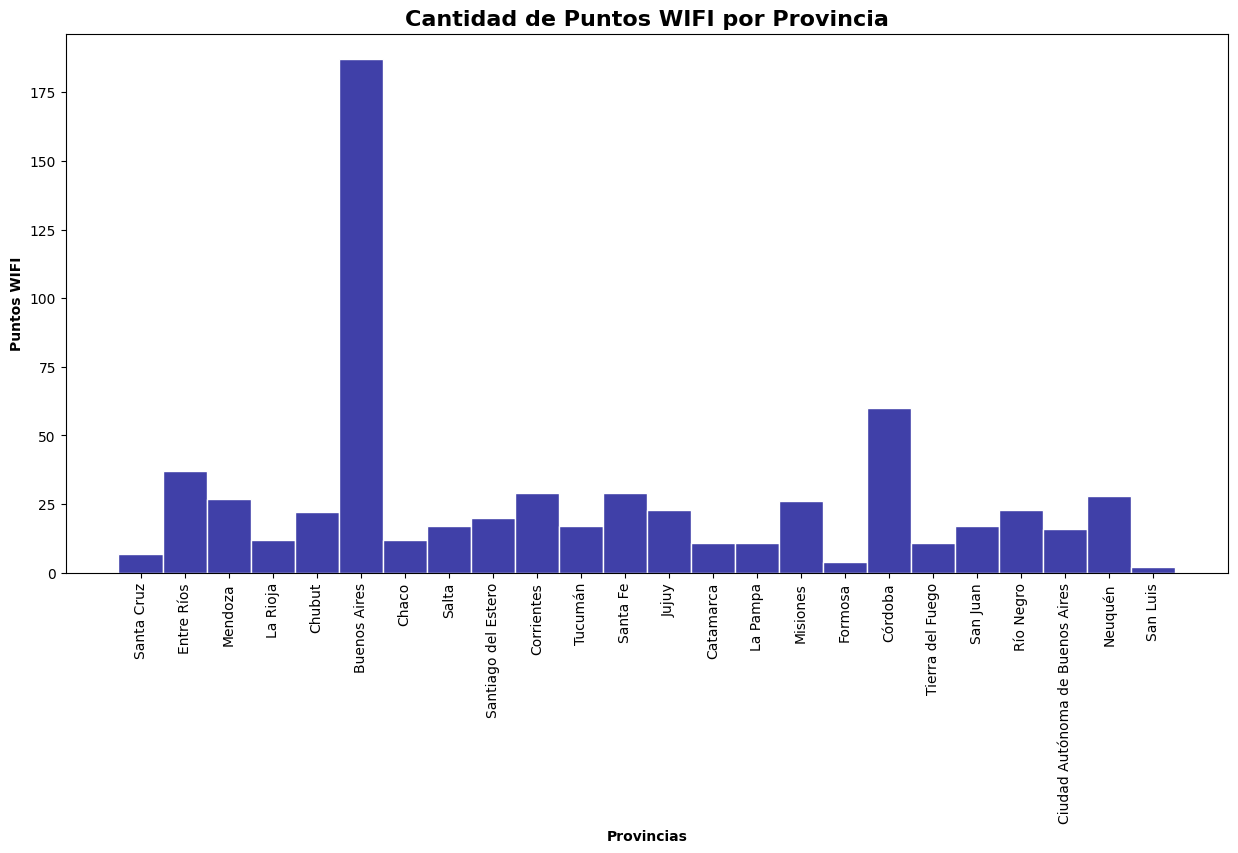

In [11]:
plt.subplots(figsize=(15,7))
sns.histplot(data=wifi,x='provincia' , color='darkblue', ec='white')
plt.title("Cantidad de Puntos WIFI por Provincia",fontweight='bold', fontsize= '16')
plt.xticks(rotation='vertical')
plt.xlabel('Provincias',fontweight='bold')
plt.ylabel('Puntos WIFI',fontweight='bold')
plt.show()

In [12]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 22.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Carga de datos

Los datos aquí abajo mostrados pertenencen al Instituto Geográfico nacional y se encuentran en https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/DivisionPolitica

In [24]:
df = pd.read_excel('/work/DatosArg.xlsx', index_col='provincia')
df

,Capital,Población,Superficie,Densidad
provincia,,,,
Ciudad Autónoma de Buenos Aires,NaN,2890151,200,14450.8
Buenos Aires,La Plata,15625084,307571,50.8
Catamarca,San Fernando del Valle de Catamarca,367828,102602,3.6
Chaco,Resistencia,1055259,99633,10.6
Chubut,Rawson,509108,224686,2.3
Córdoba,Córdoba,3308876,165321,20.0
Corrientes,Corrientes,992595,88199,11.3
Entre Ríos,Paraná,1235994,78781,15.7
Formosa,Formosa,530162,72066,7.4


## Correlación

In [31]:
wifi_corr = wifi_prov.corr(df['Población'])
wifi_corr

0.9633701097881759

Con este dato podemos observar que existe una gran correlación entre la cantidad de antenas WIFI instaladas por el país con la cantidad de población.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04c30f11-a011-40d5-8379-9fce4888ee79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>